Practice Project - 1
World Happiness Report
Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv
https://github.com/dsrscientist/DSData

Features - 11 Columns:
- Country
- Region
- Happiness Rank    
- Standard Error
- Economy (GDP per Capita)
- Family 
- Health (Life Expectancy)
- Freedom Trust 
- (Government Corruption)
- Generosity
- Dystopia Residual: unexplained components of a country

TARGET :
- Happiness Scores : continuous variable in range of  (0-10)

TYPE OF PROBLEM:
Analyzing the data and predicting the happiness score based on all key and residual factor.
Regression Problem

In [172]:
#STEP1: Importing all imports, reading data
from IPython.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style>"))

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler, LabelEncoder,PowerTransformer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV


from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import joblib 
import warnings

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("world_happiness.csv")

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Observations:
- Total no of rows are 158 i.e 158 countries and 11 features + 1 Target (Happiness Score)

In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
df.shape

(158, 12)

In [9]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# Scatterplot:

<AxesSubplot:xlabel='Country', ylabel='Happiness Score'>

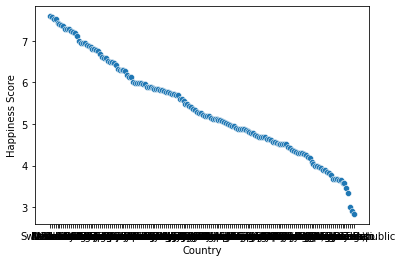

In [10]:
import seaborn as sns
sns.scatterplot(x="Country",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

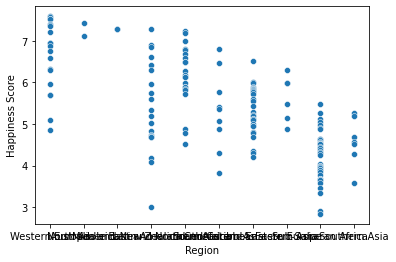

In [11]:
import seaborn as sns
sns.scatterplot(x="Region",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Happiness Rank', ylabel='Happiness Score'>

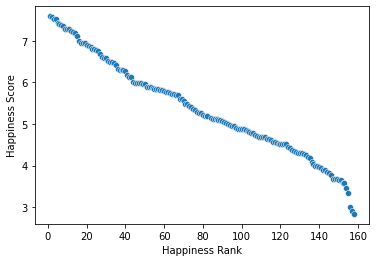

In [12]:
import seaborn as sns
sns.scatterplot(x="Happiness Rank",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

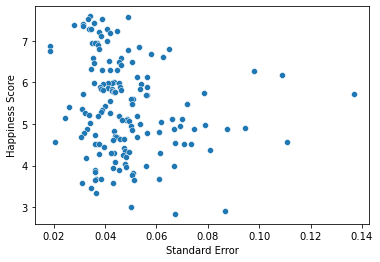

In [13]:
import seaborn as sns
sns.scatterplot(x="Standard Error",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

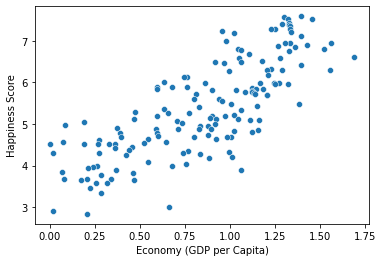

In [14]:
import seaborn as sns
sns.scatterplot(x="Economy (GDP per Capita)",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

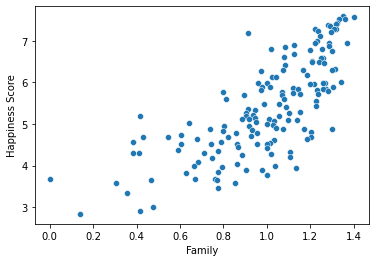

In [15]:
import seaborn as sns
sns.scatterplot(x="Family",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

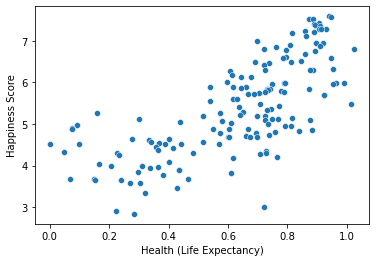

In [16]:
import seaborn as sns
sns.scatterplot(x="Health (Life Expectancy)",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

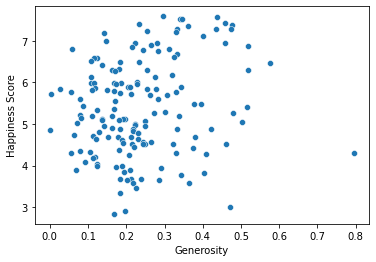

In [17]:
import seaborn as sns
sns.scatterplot(x="Generosity",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

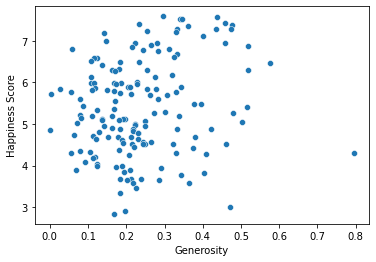

In [18]:
import seaborn as sns
sns.scatterplot(x="Generosity",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

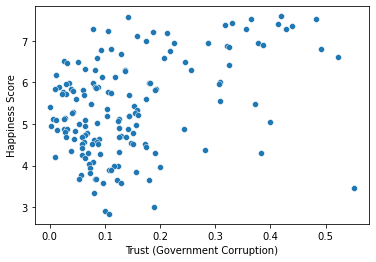

In [19]:
import seaborn as sns
sns.scatterplot(x="Trust (Government Corruption)",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

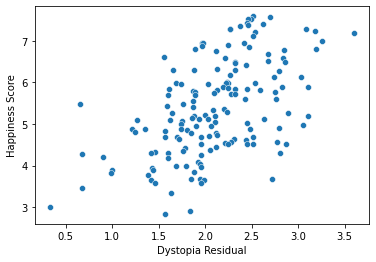

In [20]:
import seaborn as sns
sns.scatterplot(x="Dystopia Residual",y="Happiness Score",data=df)

# Describing Datasets:

In [21]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations:
- Total no of rows are 158 i.e 158 countries and 11 features + 1 Target (Happiness Score)

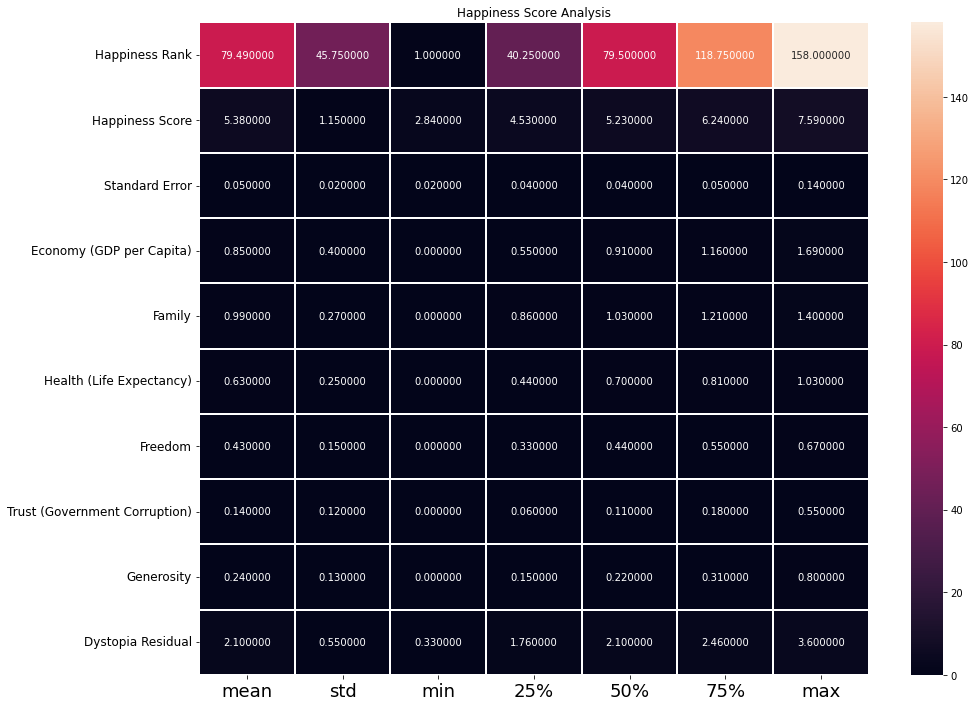

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Happiness Score Analysis")
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Exploratory Data Analysis(EDA)

1. UNivariant Analysis: Checking Distribution of columns to Check Gaussian Like Structure and Box plots for Outliers and Range

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

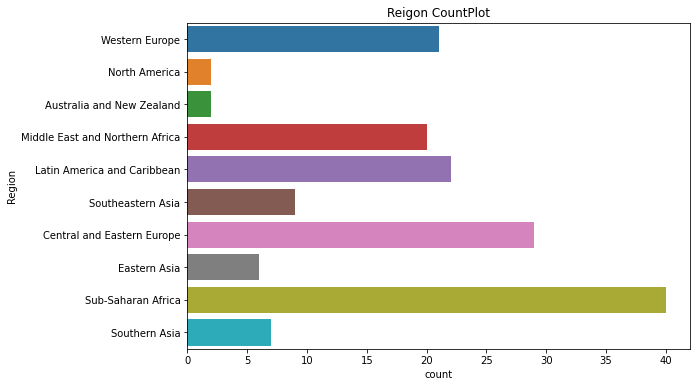

In [24]:
plt.figure(figsize=(9,6))
p = sns.countplot(data=df, y = 'Region')
plt.title('Reigon CountPlot')
plt.tight_layout

Observations:
1. Most Countries are Sub-Saharan African countries, and most parts of European countries
2. North American, Australian. New ZeALAND countries are less in Data

Labeling Categorical Data which is Country and Region

In [25]:
labelEncoder = LabelEncoder()
df['Country'] = labelEncoder.fit_transform(df['Country'])
df['Region'] = labelEncoder.fit_transform(df['Region'])

<Figure size 432x288 with 0 Axes>

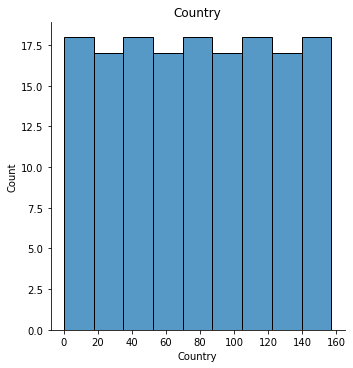

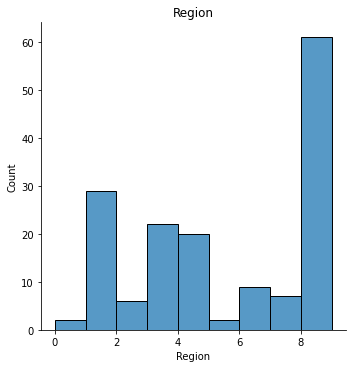

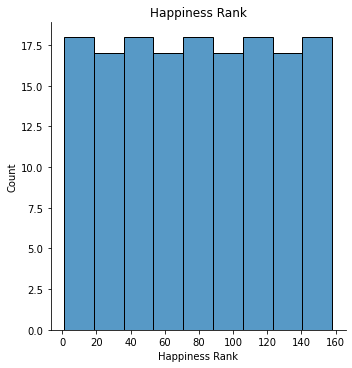

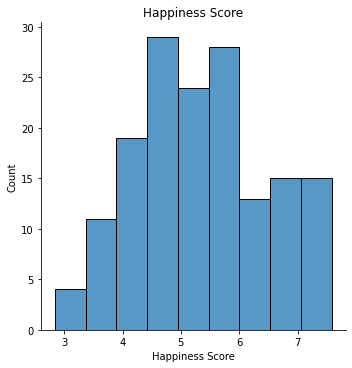

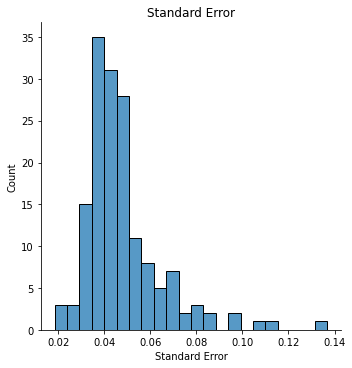

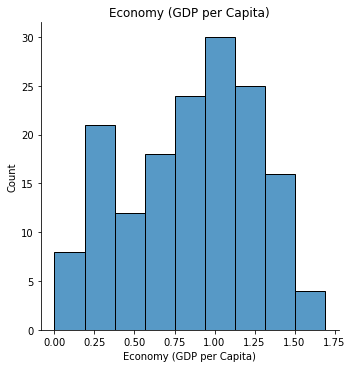

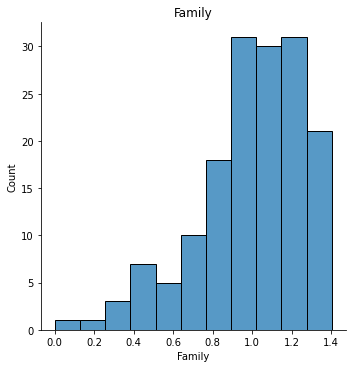

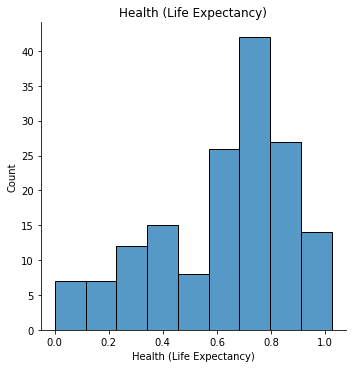

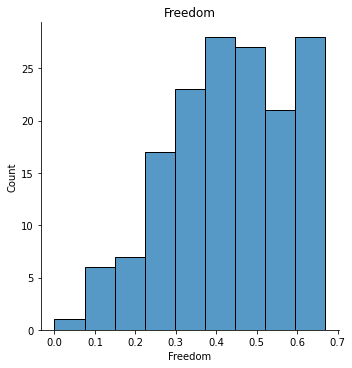

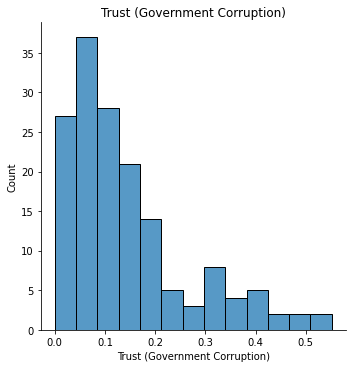

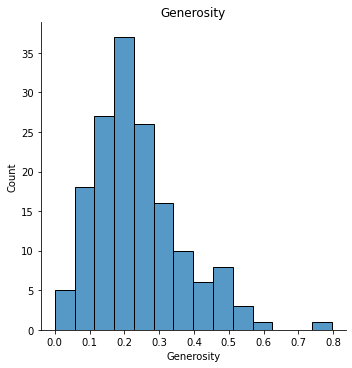

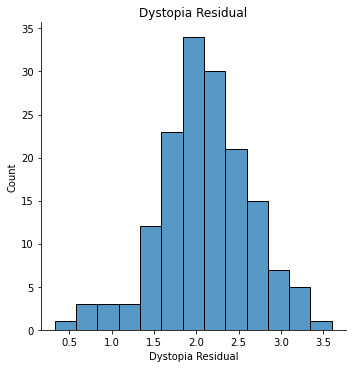

In [27]:
plt.figure()
for col in df.columns:
    sns.displot(df[col])
    plt.title(col)

Observations:
 - Notice the Skewness in data: Standard Error(left skewed), Family(Right Skewed), Trust(left skewed), Generosity(left skewed)

For MORE detailed information for skew() check below

# Skewness:

In [28]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Outliers Checking:

In [29]:
col=df.columns

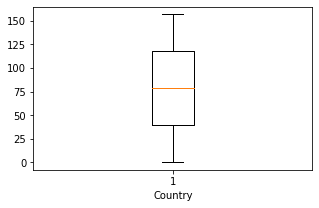

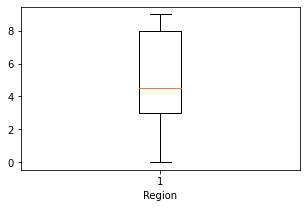

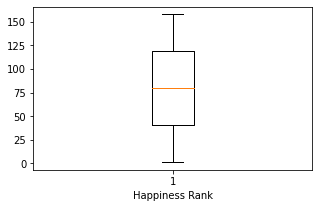

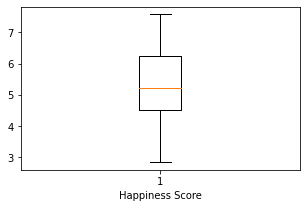

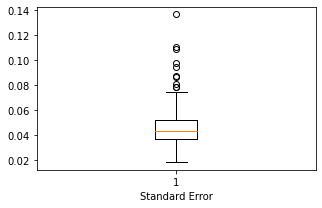

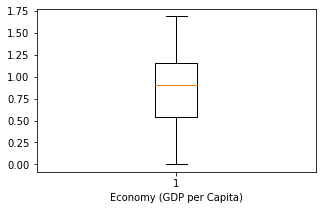

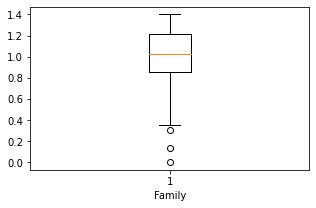

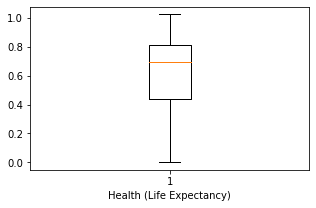

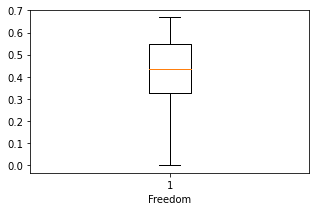

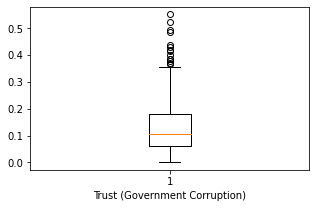

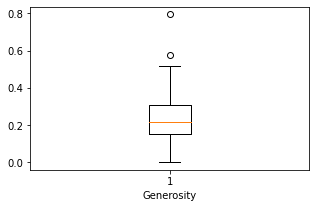

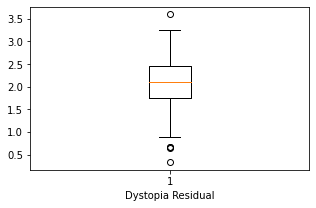

In [30]:
for i in df.columns:
    plt.figure(figsize=(5,3))
    plt.boxplot(df[i])
    plt.xlabel(i)

OBservations
 - Notice the outliers present in standard error, family, Trust, Generositry ans Dytopia ResiduAL,skewnness is slightly caused by the presence of outliers, 

# Correlation:

In [31]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


In [32]:
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Region                          -0.176791
Country                          0.083380
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

Correlation between Happiness Score and each column

# Bivariante Analysis

In [33]:
cor_table = pd.DataFrame(df.corr(),columns=df.columns)
cor_table

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


# Correlation Using Heatmap

<AxesSubplot:>

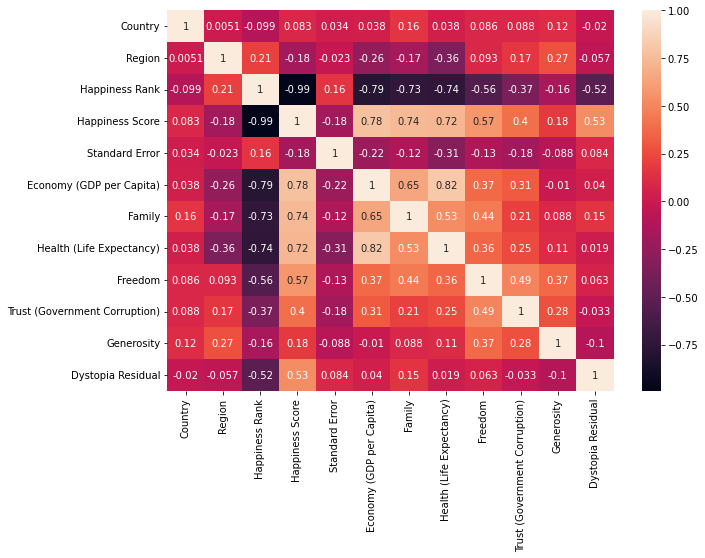

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

Plotting multicolinear features

Text(0.5, 1.0, 'Economy VS Life Expectacy')

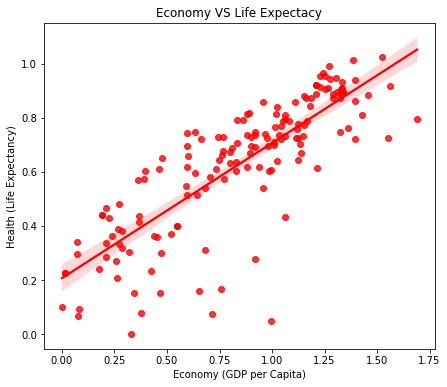

In [35]:
plt.figure(figsize=(7,6))
sns.regplot(df['Economy (GDP per Capita)'],df['Health (Life Expectancy)'],color='r')
plt.title('Economy VS Life Expectacy')

Text(0.5, 1.0, 'Economy VS Family')

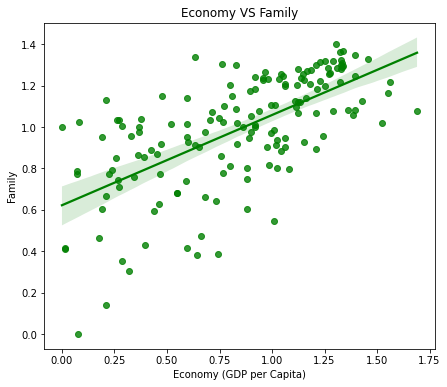

In [36]:
plt.figure(figsize=(7,6))
sns.regplot(df['Economy (GDP per Capita)'],df['Family'],color='g')
plt.title('Economy VS Family')

In [37]:
columns = ['Country', 'Region', 'Happiness Rank',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

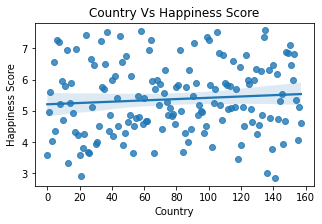

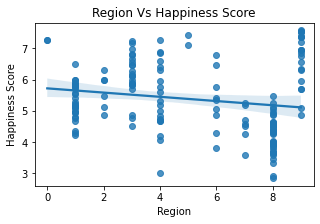

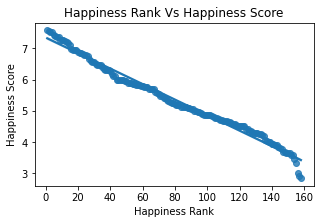

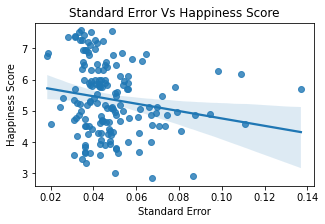

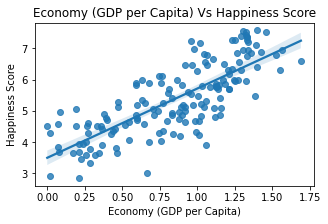

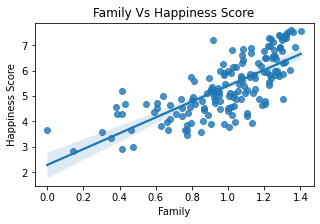

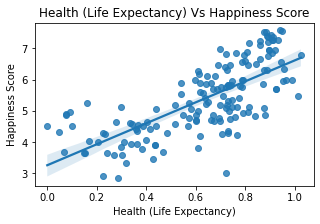

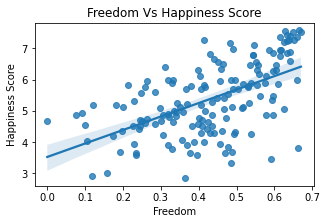

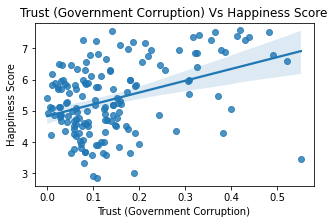

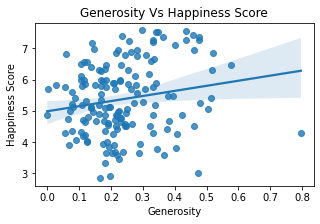

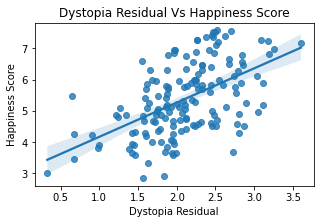

In [38]:
i = int(123)
for c in columns:
    plt.figure(figsize=(5,3))
    sns.regplot(df[c],df['Happiness Score'])
    plt.title(c+ ' Vs Happiness Score')
    plt.show()

Observations:
- From the  regPlots, we can see how features are related to the Happiness Score, we see Positive high Correlation with all the KEy Variables and Dystopia Residual.
- WE see some Negative Correlations like Happiness Rank with Happiness Score, Strongly Negatively Correlated , i.e lower thehappiness  Rank (The Country with most happiest Report) will have high Score, which makes sense.
- Standard error has moderately low negative Corelative which tells us that this columns tells us less about the Happiness Score

Multivariant Analysis

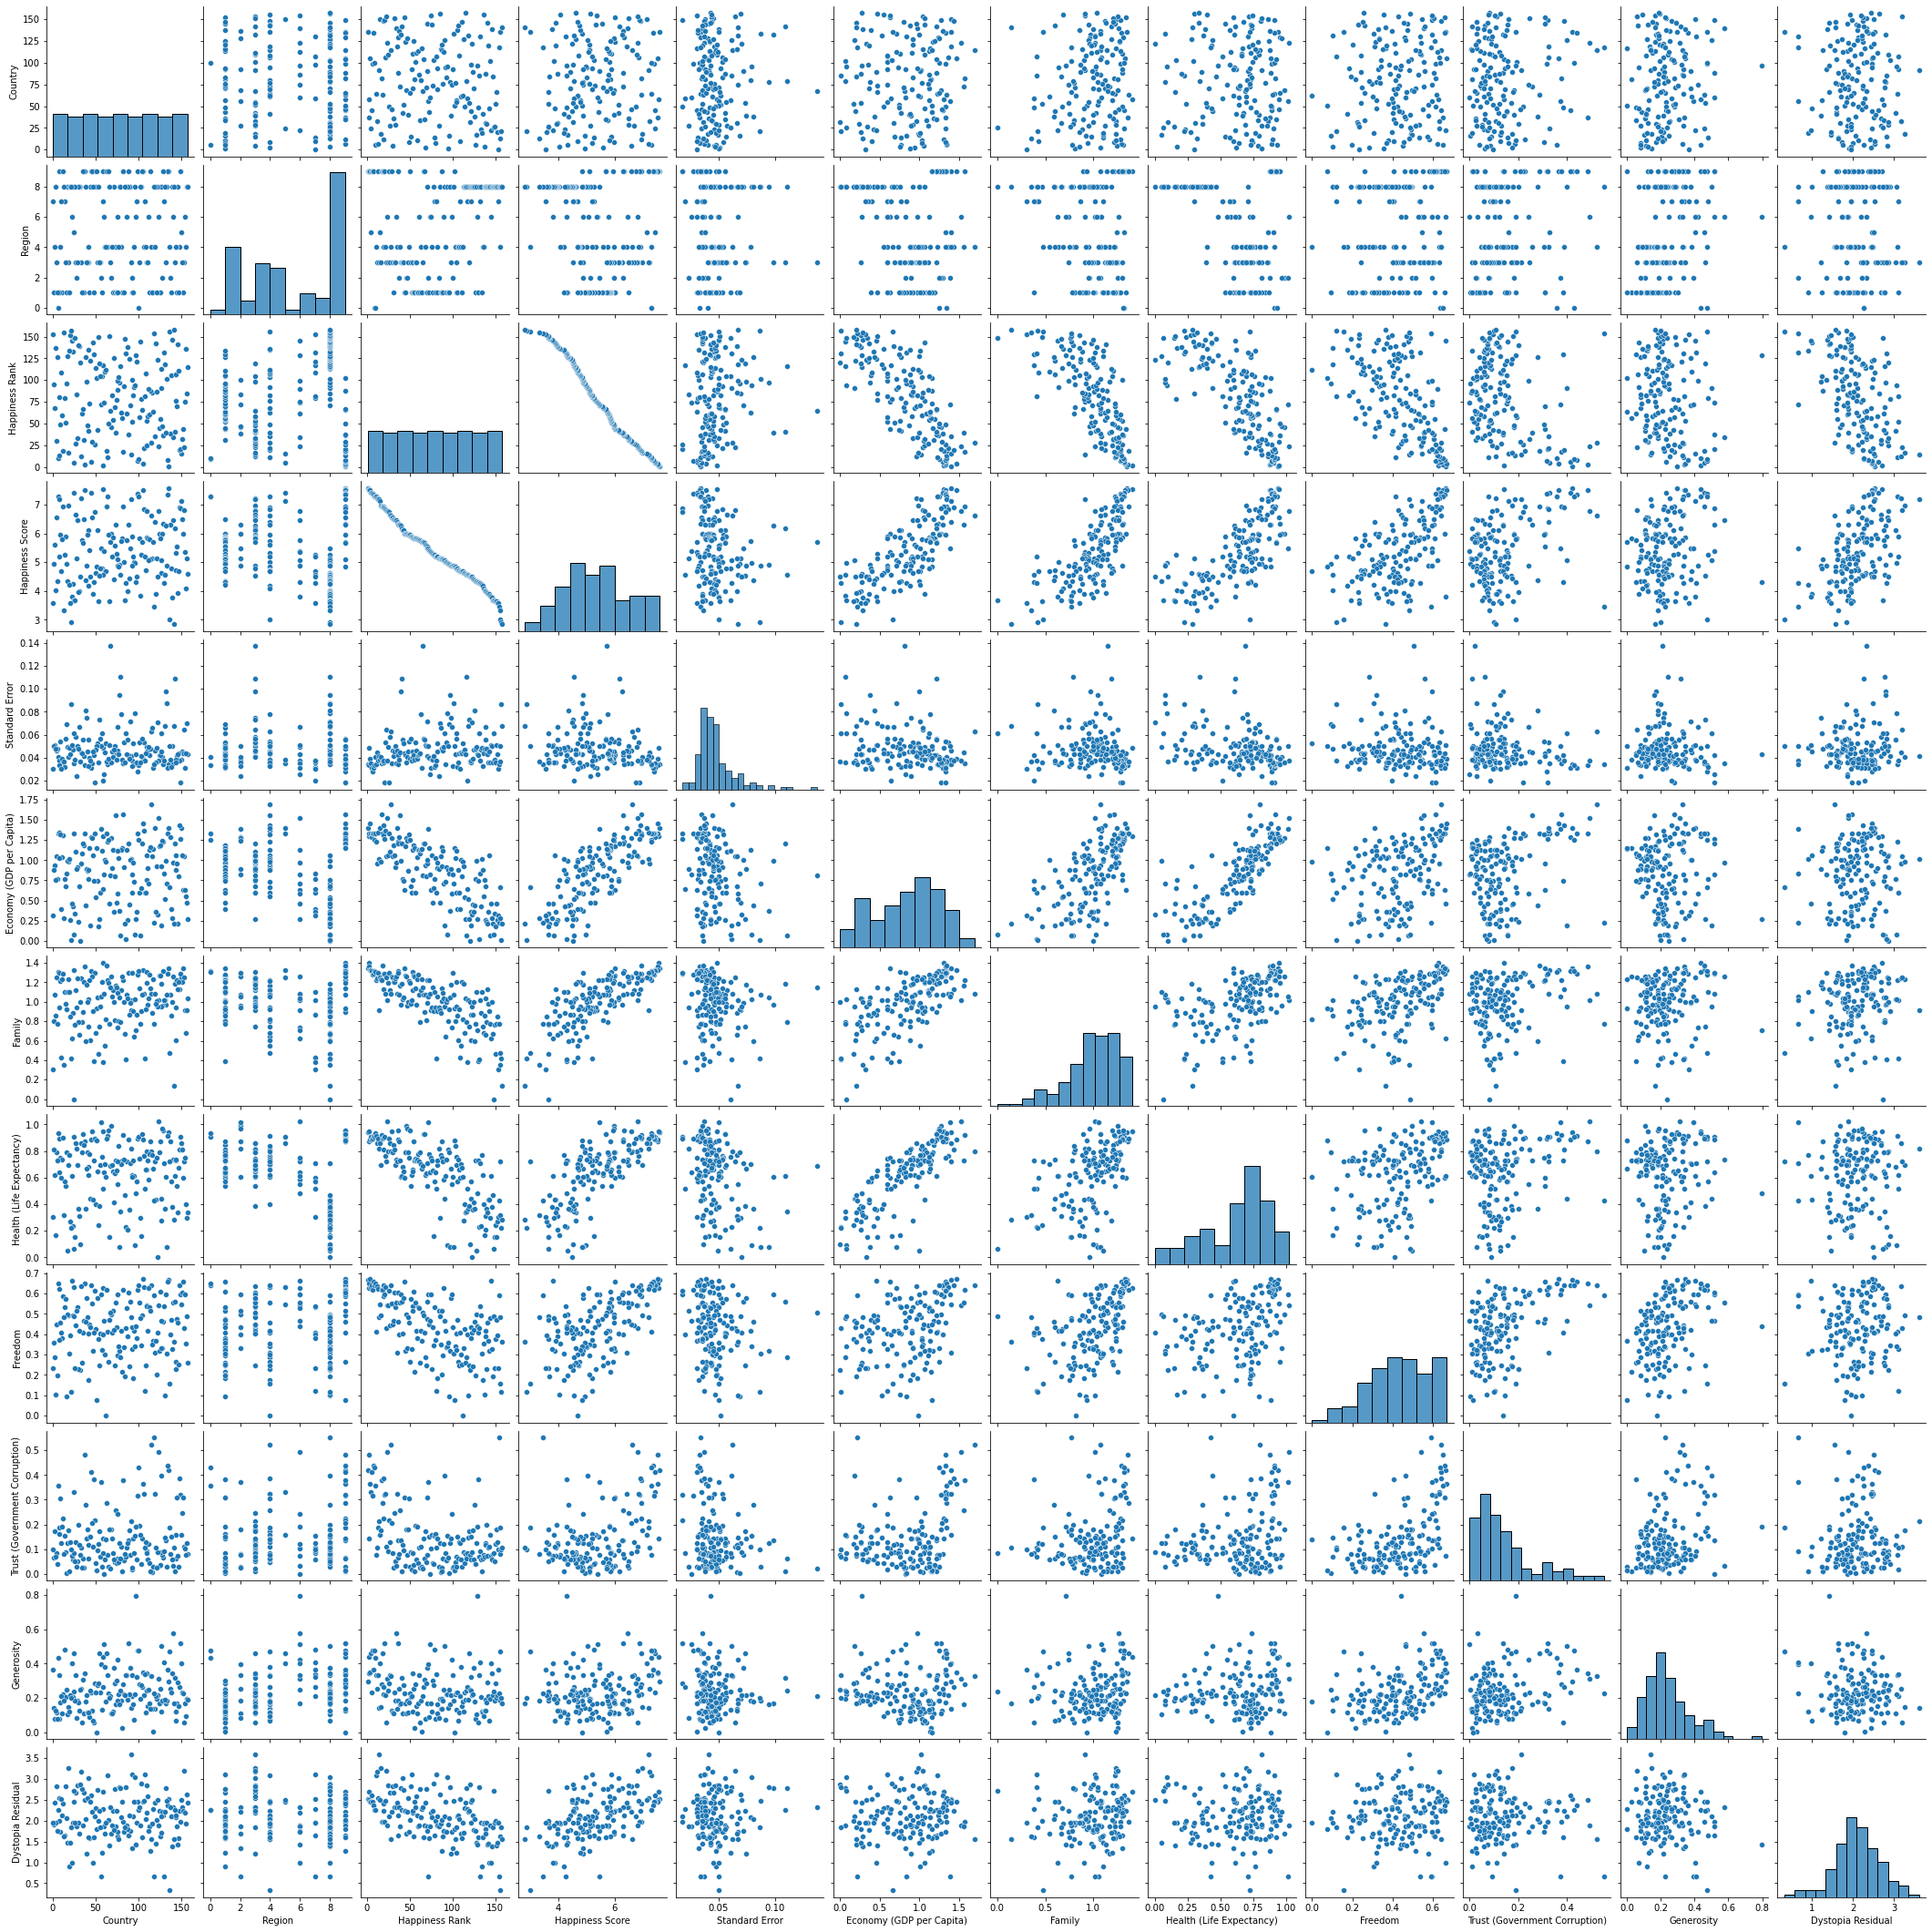

In [39]:
sns.pairplot(df)

Observations
    - As you can Observe, Happiness Rank is from 1 -159 unique Countries and 1st rank having Highest Happiness Score, Negative corelation can be been
- Standard Error are less negatively corelated, 
- Observe linear relation between features with Economy Column

# Normal Distribution Curve

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

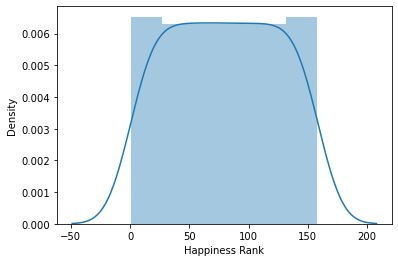

In [40]:
sns.distplot(df["Happiness Rank"])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

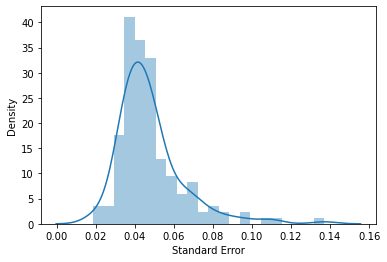

In [41]:
sns.distplot(df["Standard Error"])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

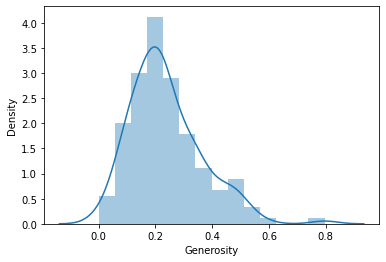

In [42]:
sns.distplot(df["Generosity"])

<AxesSubplot:xlabel='Family', ylabel='Density'>

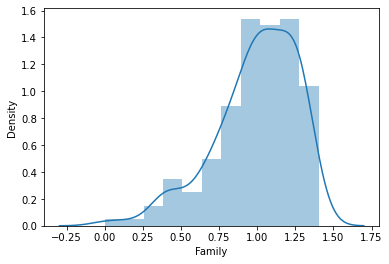

In [43]:
sns.distplot(df["Family"])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

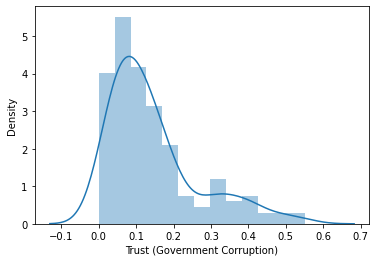

In [44]:
sns.distplot(df["Trust (Government Corruption)"])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

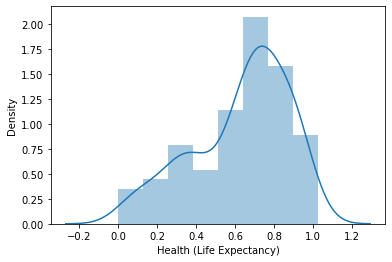

In [45]:
sns.distplot(df["Health (Life Expectancy)"])

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

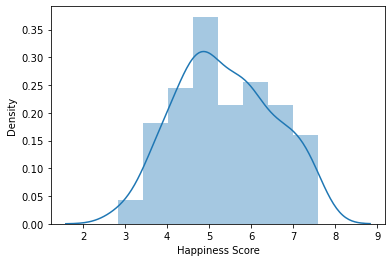

In [46]:
sns.distplot(df["Happiness Score"])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

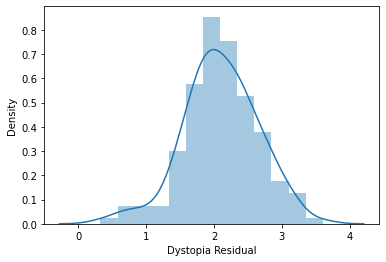

In [47]:
sns.distplot(df["Dystopia Residual"])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

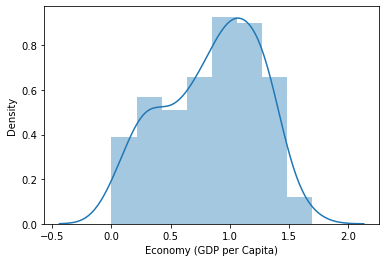

In [48]:
sns.distplot(df["Economy (GDP per Capita)"])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

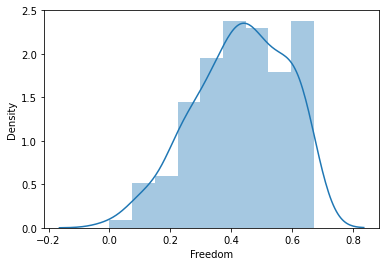

In [49]:
sns.distplot(df["Freedom"])

# DATA CLEANING

In [50]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(158, 12)

In [51]:
threshold=3 #thumb Rule
#index number
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [52]:
len(np.where(z>3)[0])

9

In [53]:
z.iloc[4]

Country                          1.194920
Region                           0.040302
Happiness Rank                   1.633299
Happiness Score                  1.797179
Standard Error                   0.722845
Economy (GDP per Capita)         1.194876
Family                           1.221204
Health (Life Expectancy)         1.118054
Freedom                          1.360416
Trust (Government Corruption)    1.555725
Generosity                       1.748563
Dystopia Residual                0.639337
Name: 4, dtype: float64

In [54]:
df_new=df[(z<3).all(axis=1)]

In [55]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        149 non-null    int32  
 1   Region                         149 non-null    int32  
 2   Happiness Rank                 149 non-null    int64  
 3   Happiness Score                149 non-null    float64
 4   Standard Error                 149 non-null    float64
 5   Economy (GDP per Capita)       149 non-null    float64
 6   Family                         149 non-null    float64
 7   Health (Life Expectancy)       149 non-null    float64
 8   Freedom                        149 non-null    float64
 9   Trust (Government Corruption)  149 non-null    float64
 10  Generosity                     149 non-null    float64
 11  Dystopia Residual              149 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 14

In [56]:
df_new.reset_index()

,index,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
145,151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
146,152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
147,154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


- TO COMPARE SKEWNESS BEFORE AND AFTER THE OUTLIER TREATMENT
- Skewness Reduced is less.

In [57]:
df.skew(), df_new.skew()

(Country                          0.000000
 Region                          -0.116119
 Happiness Rank                   0.000418
 Happiness Score                  0.097769
 Standard Error                   1.983439
 Economy (GDP per Capita)        -0.317575
 Family                          -1.006893
 Health (Life Expectancy)        -0.705328
 Freedom                         -0.413462
 Trust (Government Corruption)    1.385463
 Generosity                       1.001961
 Dystopia Residual               -0.238911
 dtype: float64,
 Country                          0.048701
 Region                          -0.096985
 Happiness Rank                   0.003268
 Happiness Score                  0.169740
 Standard Error                   1.243048
 Economy (GDP per Capita)        -0.390657
 Family                          -0.811340
 Health (Life Expectancy)        -0.747711
 Freedom                         -0.400867
 Trust (Government Corruption)    1.272530
 Generosity                       0.6

AS Regression Follow an assumption that Data to be Gaussian Like, We need to Remove Skewness
   throughSkewNess Transformation = LogTransformation/sqrt/cuberoot
   CHECK POWER TRANSFORMER BELOW WHICH DOES LOG TRANSFORMATION as no negative values are present

In [58]:
power = PowerTransformer()
for i in df_new.columns:
    if np.abs(df_new[i].skew()) > 0.5:
        df_new[[i]] = power.fit_transform(df_new[[i]])

In [59]:
df.skew(), df_new.skew()

(Country                          0.000000
 Region                          -0.116119
 Happiness Rank                   0.000418
 Happiness Score                  0.097769
 Standard Error                   1.983439
 Economy (GDP per Capita)        -0.317575
 Family                          -1.006893
 Health (Life Expectancy)        -0.705328
 Freedom                         -0.413462
 Trust (Government Corruption)    1.385463
 Generosity                       1.001961
 Dystopia Residual               -0.238911
 dtype: float64,
 Country                          0.048701
 Region                          -0.096985
 Happiness Rank                   0.003268
 Happiness Score                  0.169740
 Standard Error                  -0.031216
 Economy (GDP per Capita)        -0.390657
 Family                          -0.148528
 Health (Life Expectancy)        -0.190663
 Freedom                         -0.400867
 Trust (Government Corruption)    0.174593
 Generosity                       0.0

After Power Transformer, i.e log transformation of data which were skewed removed all skewness, making the data Gaussuan like. 
 -- After Removing Skewness, We Scale the Data

In [60]:
y = df_new['Happiness Score'].values
y = y.reshape(-1,1)

# Preprocessing Data / Feature Engineering

-- Scaling the Data with Standard Scalar

-- Choosing Features for modeling

In [61]:
scale = StandardScaler()

In [62]:
df_new.drop('Happiness Score',inplace=True,axis=1)

In [63]:
df_new

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,-0.950337,1.39651,1.658880,1.469636,0.66557,1.817625,0.659579,2.51738
1,58,9,2,0.378562,1.30232,2.009125,1.511292,0.62877,0.329676,1.562604,2.70201
2,37,9,3,-1.041401,1.32548,1.730785,1.053469,0.64938,1.953400,0.977226,2.49204
3,105,9,4,-0.471124,1.45900,1.540248,1.117188,0.66973,1.664359,1.015018,2.46531
4,24,5,5,-0.799032,1.32629,1.487718,1.242549,0.63297,1.541247,1.682150,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,0.563000,0.46534,-1.047195,-1.707662,0.46866,0.681035,-0.131736,1.41723
151,20,8,152,-0.068119,0.25812,-0.778550,-1.435893,0.39493,0.188577,0.012019,1.46494
152,0,7,153,-1.320810,0.31982,-2.087389,-1.352388,0.23414,-0.192843,1.134258,1.95210
154,13,8,155,-0.692726,0.28665,-2.010443,-1.309709,0.48450,-0.434498,-0.312080,1.63328


In [64]:
features = scale.fit_transform(df_new)

In [65]:
scaled_data = pd.DataFrame(features,columns=df_new.columns)
scaled_data

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.268260,1.296837,-1.713905,-0.950337,1.381916,1.658880,1.469636,1.583704,1.817625,0.659579,0.756876
1,-0.417415,1.296837,-1.691535,0.378562,1.138324,2.009125,1.511292,1.338953,0.329676,1.562604,1.109300
2,-0.877145,1.296837,-1.669166,-1.041401,1.198220,1.730785,1.053469,1.476027,1.953400,0.977226,0.708507
3,0.611504,1.296837,-1.646796,-0.471124,1.543526,1.540248,1.117188,1.611371,1.664359,1.015018,0.657485
4,-1.161739,-0.026647,-1.624427,-0.799032,1.200315,1.487718,1.242549,1.366887,1.541247,1.682150,0.631620
...,...,...,...,...,...,...,...,...,...,...,...
144,-0.242280,0.965966,1.641542,0.563000,-1.026255,-1.047195,-1.707662,0.274090,0.681035,-0.131736,-1.343100
145,-1.249307,0.965966,1.663911,-0.068119,-1.562163,-0.778550,-1.435893,-0.216276,0.188577,0.012019,-1.252030
146,-1.687145,0.635095,1.686281,-1.320810,-1.402596,-2.087389,-1.352388,-1.285662,-0.192843,1.134258,-0.322135
147,-1.402550,0.965966,1.731020,-0.692726,-1.488379,-2.010443,-1.309709,0.379439,-0.434498,-0.312080,-0.930702


NEED FOR PCA:
- AS we Notice Multicollinearity Existed in the data between Features, and Regression Problem Feature should have independent features, PCA not only works as Dimension Reduction, It also Reduces Multicolinearity between Features
- As No of features present is not Large, we can skip the part of dimensionality reduction .

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
df_pca = pca.fit_transform(scaled_data)
pca_scaled = pd.DataFrame(df_pca,columns=['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7','Feature8','Feature9','Feature10','Feature11'])

<AxesSubplot:>

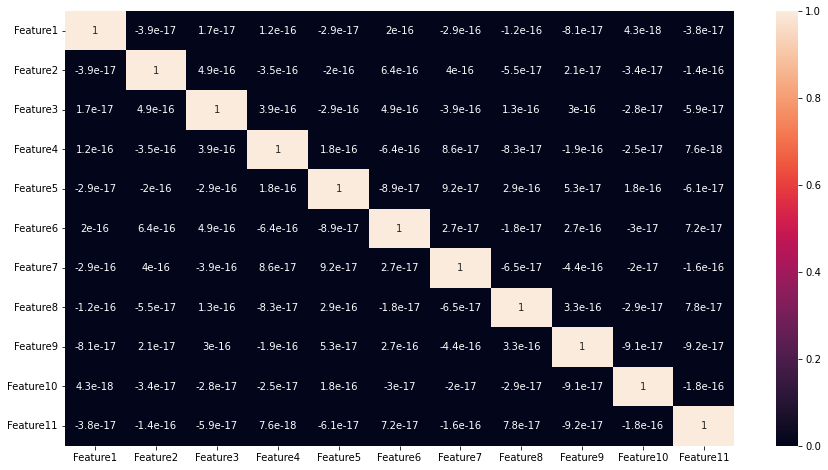

In [69]:
plt.figure(figsize=(15,8))
sns.heatmap(pca_scaled.corr(),annot=True)

OBSERVATION
- Multicollinearity Removed

# Modeling Data

Find Best Random State for fitting to a model,fitting through a model of any choice in a loop of (1,200) generated Random States to find the BEst random fit for a Model

In [70]:
pca_scaled

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11
0,-4.042287,-1.533479,0.449840,0.466969,0.366293,-1.025554,0.622307,0.093422,0.089551,-0.224205,-0.140720
1,-3.468384,-1.127426,0.675440,-0.534622,-0.372446,1.245288,1.461548,-0.008087,-0.026522,-0.348213,-0.245624
2,-3.688717,-1.691809,-0.041712,-1.435038,0.170140,-0.353858,0.592691,-0.223031,-0.474344,-0.060033,-0.024544
3,-3.760181,-1.628992,0.395848,-0.008587,-0.123056,-0.513145,0.729969,0.109247,0.041256,0.171203,-0.134579
4,-3.628828,-1.049674,-0.171897,-1.402174,-0.140975,0.673983,-0.353067,0.158773,-0.627047,0.066276,-0.102583
...,...,...,...,...,...,...,...,...,...,...,...
144,2.468328,-1.674758,-0.648257,-0.120790,-0.962966,-0.836050,-0.224477,-0.523488,0.152496,0.348300,-0.044538
145,2.697224,-1.447820,-1.082848,-0.885055,-0.259752,-0.172879,-0.096430,-0.676898,-0.312236,-0.182259,0.052942
146,3.103180,-1.392312,-1.088275,-1.531403,1.448925,0.632696,-0.725670,0.783354,-0.428187,0.379306,-0.082403
147,2.989644,-1.274381,-1.270243,-1.214078,0.525772,-0.108190,-0.466151,-0.638010,1.035521,0.088997,0.056129


In [71]:
randomstate = 0
max_score = 0
lr = LinearRegression()
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(pca_scaled,y,test_size=.30,random_state = i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = r2_score(y_test,pred)
    if(score>max_score):
        max_score = score
        randomstate  = i
print( 'Best Random State=',randomstate,' and R2 Score of LR MODEL : ',max_score*100)

Best Random State= 37  and R2 Score of LR MODEL :  99.86443839491503


In [72]:
x_train,x_test,y_train,y_test = train_test_split(pca_scaled,y,test_size=.30,random_state = 37)

Find Best Model
-  Choosing Various Regression models, checking the Training Score with Cross Validation and Testing Score with r2Score metrics and comapring both to get the best model with least error

In [73]:
models = [LinearRegression(),Lasso(),Ridge(alpha=.1),ElasticNet(),RandomForestRegressor(n_estimators=100),AdaBoostRegressor(n_estimators=100),
                      SVR(kernel= 'linear', gamma= .001, C= 1),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=11)]

In [74]:
r2_scores = []
cv_scores = []
for model in models:
    model.fit(x_train,y_train)
    pred_model = model.predict(x_test)
    score = r2_score(y_test,pred_model)
    print('r2 Score of Model ',model, 'is : ',score*100)
    r2_scores.append(score)
    print('MEAN SQUARED ERROR OF ',model ,' is : ',mean_squared_error(y_test,pred_model))
    cv_scores.append(np.mean(cross_val_score(model,scaled_data,y,cv=5,scoring='r2')))

r2 Score of Model  LinearRegression() is :  99.86443839491503
MEAN SQUARED ERROR OF  LinearRegression()  is :  0.0020713579662581054
r2 Score of Model  Lasso() is :  60.2184703761782
MEAN SQUARED ERROR OF  Lasso()  is :  0.6078549176559741
r2 Score of Model  Ridge(alpha=0.1) is :  99.86351551699656
MEAN SQUARED ERROR OF  Ridge(alpha=0.1)  is :  0.002085459381825669
r2 Score of Model  ElasticNet() is :  75.51981548542723
MEAN SQUARED ERROR OF  ElasticNet()  is :  0.37405300105398837
r2 Score of Model  RandomForestRegressor() is :  90.31073860735017
MEAN SQUARED ERROR OF  RandomForestRegressor()  is :  0.14805024446444487
r2 Score of Model  AdaBoostRegressor(n_estimators=100) is :  92.27849719626987
MEAN SQUARED ERROR OF  AdaBoostRegressor(n_estimators=100)  is :  0.11798323230213795
r2 Score of Model  SVR(C=1, gamma=0.001, kernel='linear') is :  99.78059288061462
MEAN SQUARED ERROR OF  SVR(C=1, gamma=0.001, kernel='linear')  is :  0.0033525029768404603
r2 Score of Model  DecisionTreeReg

In [75]:
cv_scores

[0.8979070027703717,
 -19.689837128820017,
 0.897205693957404,
 -12.59495847204907,
 -1.770627903983349,
 -2.6962157738888313,
 0.8416510400180544,
 -1.3939365494202833,
 -4.8742776924217015]

In [76]:
dif = []
for i in range(0,9):
    diff = r2_scores[i] - cv_scores[i]
    dif.append(diff)
dic_ = {'r2_score': r2_scores,
         'cv_scores': cv_scores,
          'Diff in Scores': dif
       }

In [77]:
table = pd.DataFrame(dic_, index=['LR','LAS','Rid','EN','RF','ABR','SVR','DTR','KNR'])

In [78]:
table

,r2_score,cv_scores,Diff in Scores
LR,0.998644,0.897907,0.100737
LAS,0.602185,-19.689837,20.292022
Rid,0.998635,0.897206,0.101429
EN,0.755198,-12.594958,13.350157
RF,0.903107,-1.770628,2.673735
ABR,0.922785,-2.696216,3.619001
SVR,0.997806,0.841651,0.156155
DTR,0.829162,-1.393937,2.223099
KNR,0.909677,-4.874278,5.783955


Observations : TO CHECK OVERFITTING
- Most of the models are suffering from overfitting, as thier Training score is Very less, in negative and TEsting Score is high.
- LINear Regression/SVR OR Ridge having least difference  having LEss error Term, having Testing and Training score both in range and having no error term.
- MODEL CHOSEN  is LINearRegression

# Evaluation The Model

In [79]:
Linear_Model = LinearRegression()
Linear_Model.fit(x_train,y_train)
pred_model = Linear_Model.predict(x_test)
score = r2_score(y_test,pred_model)
print('CV_Score',np.mean(cross_val_score(Linear_Model,pca_scaled,y,cv=5,scoring='r2')))
print('Difference:' ,( score - np.mean(cross_val_score(Linear_Model,pca_scaled,y,cv=5,scoring='r2') )))
print('r2 Score of Model ',Linear_Model, 'is : ',score)
print('MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',mean_squared_error(y_test,pred_model))
print('Root MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',np.sqrt(mean_squared_error(y_test,pred_model)))
print('MEAN Absolute ERROR OF ',Linear_Model ,' is : ',mean_absolute_error(y_test,pred_model))

CV_Score 0.8979070027703717
Difference: 0.10073738117877862
r2 Score of Model  LinearRegression() is :  0.9986443839491503
MEAN SQUARED ERROR OF  LinearRegression()  is :  0.0020713579662581054
Root MEAN SQUARED ERROR OF  LinearRegression()  is :  0.04551217382479226
MEAN Absolute ERROR OF  LinearRegression()  is :  0.03650639039339818


TUNING PARAMETER For the SVR Model / Ridge Model

In [80]:
svr= SVR()
params = {'kernel': ['linear','rbf'],
           'C': [1,10,.1,.001,.01],
          'gamma':[1,10,.1,.001,.01]
         
         }
search = RandomizedSearchCV(svr,params,cv=5,scoring='r2',n_iter=40)

In [81]:
search.fit(pca_scaled,y)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=40,
                   param_distributions={'C': [1, 10, 0.1, 0.001, 0.01],
                                        'gamma': [1, 10, 0.1, 0.001, 0.01],
                                        'kernel': ['linear', 'rbf']},
                   scoring='r2')

In [82]:
search.best_params_

{'kernel': 'linear', 'gamma': 1, 'C': 1}

In [83]:
ridge= Ridge()
params = {'alpha': [1,.1,.001,10,.0001]         }
grid = GridSearchCV(ridge,params,cv=5,scoring='r2')

In [84]:
grid.fit(pca_scaled,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.001, 10, 0.0001]}, scoring='r2')

In [85]:
grid.best_params_

{'alpha': 0.0001}

In [86]:
ridge = Ridge(alpha = .0001)
ridge.fit(x_train,y_train)
pred_model = ridge.predict(x_test)
score = r2_score(y_test,pred_model)
print('CV_Score',np.mean(cross_val_score(ridge,pca_scaled,y,cv=5,scoring='r2')))
print('r2 Score of Model ',Linear_Model, 'is : ',score)
print('Difference:' ,( score - np.mean(cross_val_score(ridge,pca_scaled,y,cv=5,scoring='r2') )))
print('MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',mean_squared_error(y_test,pred_model))
print('Root MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',np.sqrt(mean_squared_error(y_test,pred_model)))
print('MEAN Absolute ERROR OF ',Linear_Model ,' is : ',mean_absolute_error(y_test,pred_model))

CV_Score 0.8979063443423273
r2 Score of Model  LinearRegression() is :  0.9986443754035216
Difference: 0.10073803106119428
MEAN SQUARED ERROR OF  LinearRegression()  is :  0.0020713710238315355
Root MEAN SQUARED ERROR OF  LinearRegression()  is :  0.04551231727600272
MEAN Absolute ERROR OF  LinearRegression()  is :  0.036506396169669296


In [87]:
svr = SVR(kernel= 'linear', gamma= .001, C= 1)
svr.fit(x_train,y_train)
pred_model = svr.predict(x_test)
score = r2_score(y_test,pred_model)
print('CV_Score',np.mean(cross_val_score(svr,pca_scaled,y,cv=5,scoring='r2')))
print('r2 Score of Model ',Linear_Model, 'is : ',score)
print('Difference:' ,( score - np.mean(cross_val_score(svr,pca_scaled,y,cv=5,scoring='r2') )))
print('MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',mean_squared_error(y_test,pred_model))
print('Root MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',np.sqrt(mean_squared_error(y_test,pred_model)))
print('MEAN Absolute ERROR OF ',Linear_Model ,' is : ',mean_absolute_error(y_test,pred_model))

CV_Score 0.8416510400123354
r2 Score of Model  LinearRegression() is :  0.9978059288061463
Difference: 0.1561548887938109
MEAN SQUARED ERROR OF  LinearRegression()  is :  0.0033525029768404603
Root MEAN SQUARED ERROR OF  LinearRegression()  is :  0.057900802903245306
MEAN Absolute ERROR OF  LinearRegression()  is :  0.04813944830057757


Observations:
- After Tuning Paramter in SVR Model the difference between the training and testing score is .155  and that of linear Regression and Lasso is .1007 approximately,
-We can Choose Either of Linear / Ridge Regression
- I choose Ridge Regression as it might help to provide optimum future predictions for following year and also if no of Features increases or no of data/ Countries increase, Ridge would provide more optimum prediction than Linear Regression.

# SERIALIZATION

In [88]:
joblib.dump(ridge,'world_happiest_record_Ridge.pk')

['world_happiest_record_Ridge.pk']

In [89]:
lg = joblib.load('world_happiest_record_Ridge.pk')